In [ ]:
# HIDDEN
from datascience import *
%matplotlib inline
path_data = '../../../data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
section_3_average = 13.667

# Hypothesis Test Vocabulary

**Null Hypothesis**

**Alternative Hypothesis**

**Test Statistic**

**Observed value of the test statistic**

**Simulated values of the test statistic *under the null hypothesis***

**P-Value**

**Hypothesis Test**: Compare the test statistic with the simulated values of the test statistic *under the null hypothesis*

Deciding what to do with the results of a hypothesis test **is a matter of judgment**

Example:

13 Class Sections. Students of one TA have lower average exam scores.  Why?

Null: Lower scores are due to random chance.  Scores are like the scores picked from the same number of students across all sections.

Alternative: Scores are too low due to some other reason

In [24]:
scores = Table.read_table('https://umass-data-science.github.io/190fwebsite/notebooks/scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [25]:
section_averages = scores.group('Section', np.average)
section_averages.show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [27]:
scores.column('Midterm').mean()#this is the population mean

15.493036211699165

In [28]:
scores.group('Section')#section 3 is the sample from the population
#the mean of the sample is 13.6667, the sample size is 27

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [32]:
#calculate one value of the simulated statistic under the null hypothesis
scores_only = scores.drop('Section')
sampled_scores = scores_only.sample(27, with_replacement=False)
sampled_scores

Midterm
13
22
25
15
14
20
12
24
12
17


In [33]:
np.average(sampled_scores.column('Midterm'))

16.296296296296298

In [34]:
#Calculate 10000 possible simulated values of the statistic
#This is the distribution of the test statistic under the null
averages = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    sampled_scores = scores_only.sample(27, with_replacement=False)
    averages = np.append(averages, np.average(sampled_scores.column('Midterm')))

In [36]:
scores_only

Midterm
22
12
23
14
20
25
19
24
8
14


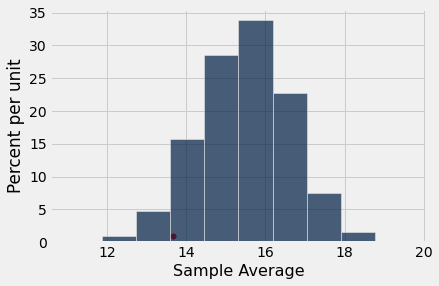

In [35]:
#plot the distribution of the test statistic under the null
#compare the observed test statistic with the null distribution
#Is the observed statistic likely to have come from the null distribution?
sample_averages = Table().with_column('Sample Average', averages)
sample_averages.hist()

observed_statistic = 13.667
plots.scatter(observed_statistic, .01, color='red', s=30);